# Google Play Data Analysis

## Read Data

In [2]:
import pandas as pd
import numpy as np
datafile = "googleplaystore.csv"
df = pd.read_csv(datafile)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- only the Rating column is numerical

In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Preprocessing

#### 1. convert number of reviews to int

In [6]:
# df['Reviews'].astype(int) #error in direct conversion

- since there is an error in direct conversion, there must be entries with non-integer values

In [7]:
import re
p = re.compile('[a-zA-Z]+')
t = df['Reviews'].apply(lambda x: p.search(str(x))!=None)
np.where(t)

(array([10472], dtype=int64),)

- there is one entry with a non-integer value at row 10372

In [8]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

- we see that there is no category for this app, and all cells have been shifted one column left
- we went to https://play.google.com/store/apps/details?id=com.lifemade.internetPhotoframe to find the actual category and updated the original data

In [9]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018', '1.0.19', '4.0 and up']

- now we can convert number of reviews to int successfully

In [10]:
df['Reviews'] = df['Reviews'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


#### 2. convert size to int

- remove ',' and 'M', 'k' from app size and convert to common unit Megabyte (divide k by 1000)

In [11]:
df['Size'] = df['Size'].apply(lambda x: re.sub(',*M*','',str(x)))
df['Size'] = df['Size'].apply(lambda x: float(re.sub('k*','',str(x)))/1000 if 'k' in str(x) else x)

- remove apps with variable size and save in new df for future use

In [12]:
p = re.compile('[0-9.]+')
non_num_df = df['Size'].apply(lambda x: p.search(str(x))==None)
apps_with_var_size = df[non_num_df]
print(len(apps_with_var_size))
apps_with_var_size.head()

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


- disinclude apps with var size, and convert convert app size to float

In [13]:
df = df[non_num_df==False]
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null object
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(1), object(10)
memory usage: 964.6+ KB


#### 3. convert num of installs to int

In [14]:
df['Installs'] = df['Installs'].apply(lambda x: re.sub(',*\+*','',str(x)))
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 928.9+ KB


#### 4. convert price to float

In [15]:
df['Price'] = df['Price'].apply(lambda x: str(x).strip('$'))
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null float64
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 928.9+ KB


#### 5. convert category to index


- map category to index in dictionary

In [16]:
c = list(df['Category'].unique())
category_dict = {i : c[i] for i in range(len(c))}
category_dict

{0: 'ART_AND_DESIGN',
 1: 'AUTO_AND_VEHICLES',
 2: 'BEAUTY',
 3: 'BOOKS_AND_REFERENCE',
 4: 'BUSINESS',
 5: 'COMICS',
 6: 'COMMUNICATION',
 7: 'DATING',
 8: 'EDUCATION',
 9: 'ENTERTAINMENT',
 10: 'EVENTS',
 11: 'FINANCE',
 12: 'FOOD_AND_DRINK',
 13: 'HEALTH_AND_FITNESS',
 14: 'HOUSE_AND_HOME',
 15: 'LIBRARIES_AND_DEMO',
 16: 'LIFESTYLE',
 17: 'GAME',
 18: 'FAMILY',
 19: 'MEDICAL',
 20: 'SOCIAL',
 21: 'SHOPPING',
 22: 'PHOTOGRAPHY',
 23: 'SPORTS',
 24: 'TRAVEL_AND_LOCAL',
 25: 'TOOLS',
 26: 'PERSONALIZATION',
 27: 'PRODUCTIVITY',
 28: 'PARENTING',
 29: 'WEATHER',
 30: 'VIDEO_PLAYERS',
 31: 'NEWS_AND_MAGAZINES',
 32: 'MAPS_AND_NAVIGATION'}

- create reverse dictionary to set indexes

In [17]:
category_r_dict = {v : k for (k,v) in category_dict.items()}
df['Category'] = df['Category'].apply(lambda x: category_r_dict[x])

#### 6. convert app type to indexes

In [18]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [19]:
df['Type'] = df['Type'].apply(lambda x: 0 if x=='Free' else 1)

#### 7. convert content rating to indexes

In [20]:
l = df['Content Rating'].unique()
l

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
content_rating_dict = {i:l[i] for i in range(len(l))}
content_rating_r_dict = {v : k for (k,v) in content_rating_dict.items()}
df['Content Rating'] = df['Content Rating'].apply(lambda x: content_rating_r_dict[x])

In [22]:
df['Content Rating'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

#### 8. convert genre to indexes

In [23]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

- we find there are multiple genres for a single app, so we should segment the data for analysis

In [24]:
df['Genres'] = df['Genres'].apply(lambda x: str(x).split(';'))
t2 = df['Genres'].apply(lambda x: len(x)>2)
df[t2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- we find that a single app has at most two types of genres, so we add new columns Genre 1 and Genre2 in place of the original column Genres

In [25]:
df['Genre1'] = df['Genres'].apply(lambda x: x[0])
df['Genre2'] = df['Genres'].apply(lambda x: x[1] if len(x)>1 else None)

In [26]:
df.drop('Genres',axis=1,inplace=True)

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0.0,0,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,0,3.9,967,14.0,500000,0,0.0,0,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0.0,0,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0.0,1,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0.0,0,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


In [28]:
df['Genre1'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Strategy',
       'Action', 'Puzzle', 'Sports', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Educational', 'Music',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [29]:
df['Genre2'].unique()

array([None, 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Education', 'Brain Games', 'Music & Video'], dtype=object)

#### 9. Convert last updated to datetime

In [30]:
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x:datetime.datetime.strptime(x,'%B %d, %Y'))

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0.0,0,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,0,3.9,967,14.0,500000,0,0.0,0,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0.0,0,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0.0,1,2018-06-08,Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0.0,0,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


## Exploring meaningfulless of data

- does it make sense to keep data where installs and reviews are 0?

In [69]:
sum(np.where(df['Installs']==0,1,0))

14

In [70]:
'%1.5f%%'%(sum(np.where(df['Installs']==0,1,0))*100/len(df))

'0.15307%'

In [71]:
sum(np.where(df['Reviews']==0,1,0))

557

In [72]:
'%1.5f%%'%(sum(np.where(df['Reviews']==0,1,0))*100/len(df))

'6.09009%'

- since the records where installs are 0 make up only 0.15307% of total data, we will remove them
- we will need to take a closer look at records with no reviews

In [74]:
df = df[df['Installs']!=0]

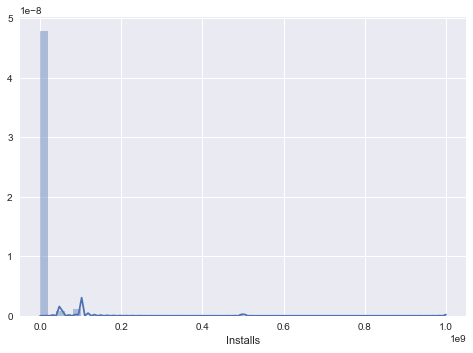

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.distplot(df['Installs'])

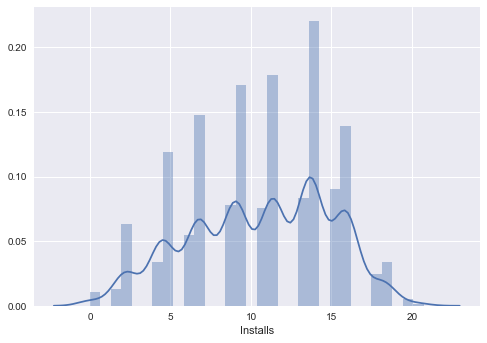

In [77]:
sns.distplot(np.log(df['Installs']))

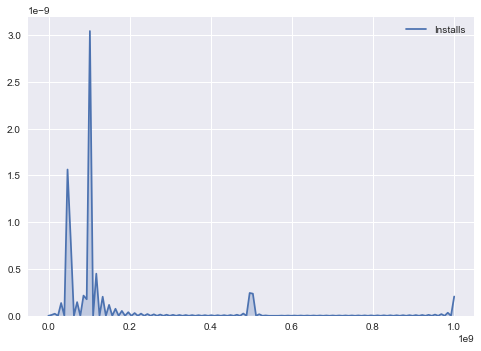

In [59]:
sns.kdeplot(x, shade=True)

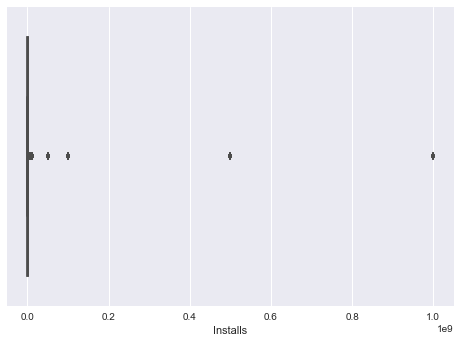

In [60]:
sns.boxplot(x)

## Basic data analysis

### *Rough look at relations between each attributes*

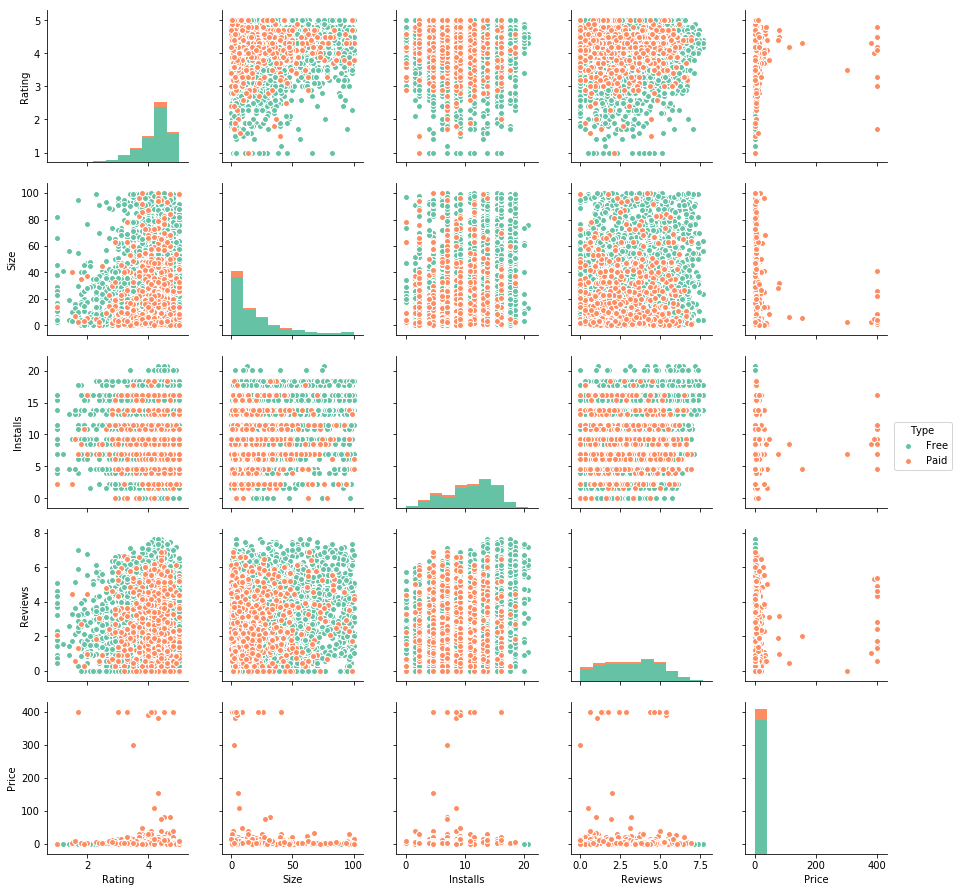

In [41]:
import seaborn as sns
#### 删dropna
x = df['Rating'].dropna()
y = df['Size']
z = df['Installs'][df.Installs!=0]
p = df['Reviews'][df.Reviews!=0]
t = df['Type']
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

### *Market share*

In [114]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [129]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

appNum_by_categorys = df['Category'].value_counts().sort_values(ascending = False)

temp_data = [go.Pie(labels = appNum_by_categorys.index,
                    values = appNum_by_categorys.values, 
                    hoverinfo = 'label+value')]

#py.iplot(temp_data, filename='market_share_pie_chart')
py.iplot([temp_data], filename='market_share_pie_chart')
#appNum_cate_df = pd.DataFrame(appNum_by_categorys.size())
#appNum_cate_df
#appNum_cate_df.columns=['Num']
#appNum_cate_df.sort_values(by = 'Num', ascending = False)
#for cat in appNum_by_categorys:
#    print (cat)
#appNum_cate_df = pd.DataFrame({'Category':})


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [[Pie({
    'hoverinfo': 'label+value',
    'labels': array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PERSONALIZATION',
                     'LIFESTYLE', 'SPORTS', 'FINANCE', 'PRODUCTIVITY', 'COMMUNICATION',
                     'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'DATING',
                     'SOCIAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL',
                     'VIDEO_PLAYERS', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK',
                     'ENTERTAINMENT', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES',
                     'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'WEATHER', 'EVENTS', 'PARENTING',
                     'COMICS', 'BEAUTY'], dtype=object),
    'values': array([1832, 1015,  739,  434,  400,  355,  346,  311,  307,  303,  265,  264,
                      254,  216,  212,  210,  201,  197,  192,  131,  111,  108,  100,   90,
                       82,   75,   68,   62,   57,   57,   54,   51,   47])
})]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'heatmap',
                     'heatmapgl', 'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcats', 'parcoords', 'pie', 'pointcloud',
                     'sankey', 'scatter', 'scatter3d',
                     'scattercarpet', 'scattergeo', 'scattergl',
                     'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

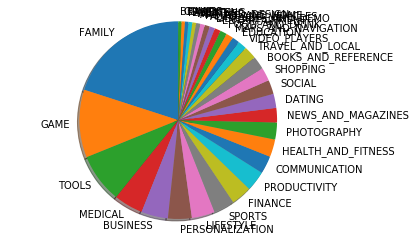

In [128]:
sizes = list(appNum_by_categorys.values)
labels = list(appNum_by_categorys.index)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### *Relation between category and ratings*

In [19]:
## Initialize dateframe of category vs rating
category = list(df.Category.unique())
average_ratings = []
for item in category:
    i = df[df.Category == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
cate_rate = pd.DataFrame({'Category':category,'Average Rating':average_ratings})
cate_rate

,Category,Average Rating
0,ART_AND_DESIGN,4.150000
1,AUTO_AND_VEHICLES,3.484000
2,BEAUTY,3.378723
3,BOOKS_AND_REFERENCE,3.157868
4,BUSINESS,2.533750
5,COMICS,3.968627
6,COMMUNICATION,3.266792
7,DATING,3.229717
8,EDUCATION,4.347748
9,ENTERTAINMENT,4.146667


In [20]:
## Sort dateframe by rating
cate_rate = cate_rate.sort_values(by = ['Average Rating'], ascending = False)
cate_rate

,Category,Average Rating
8,EDUCATION,4.347748
0,ART_AND_DESIGN,4.150000
9,ENTERTAINMENT,4.146667
17,GAME,4.097044
5,COMICS,3.968627
22,PHOTOGRAPHY,3.853150
29,WEATHER,3.794737
21,SHOPPING,3.765174
18,FAMILY,3.698472
20,SOCIAL,3.588095


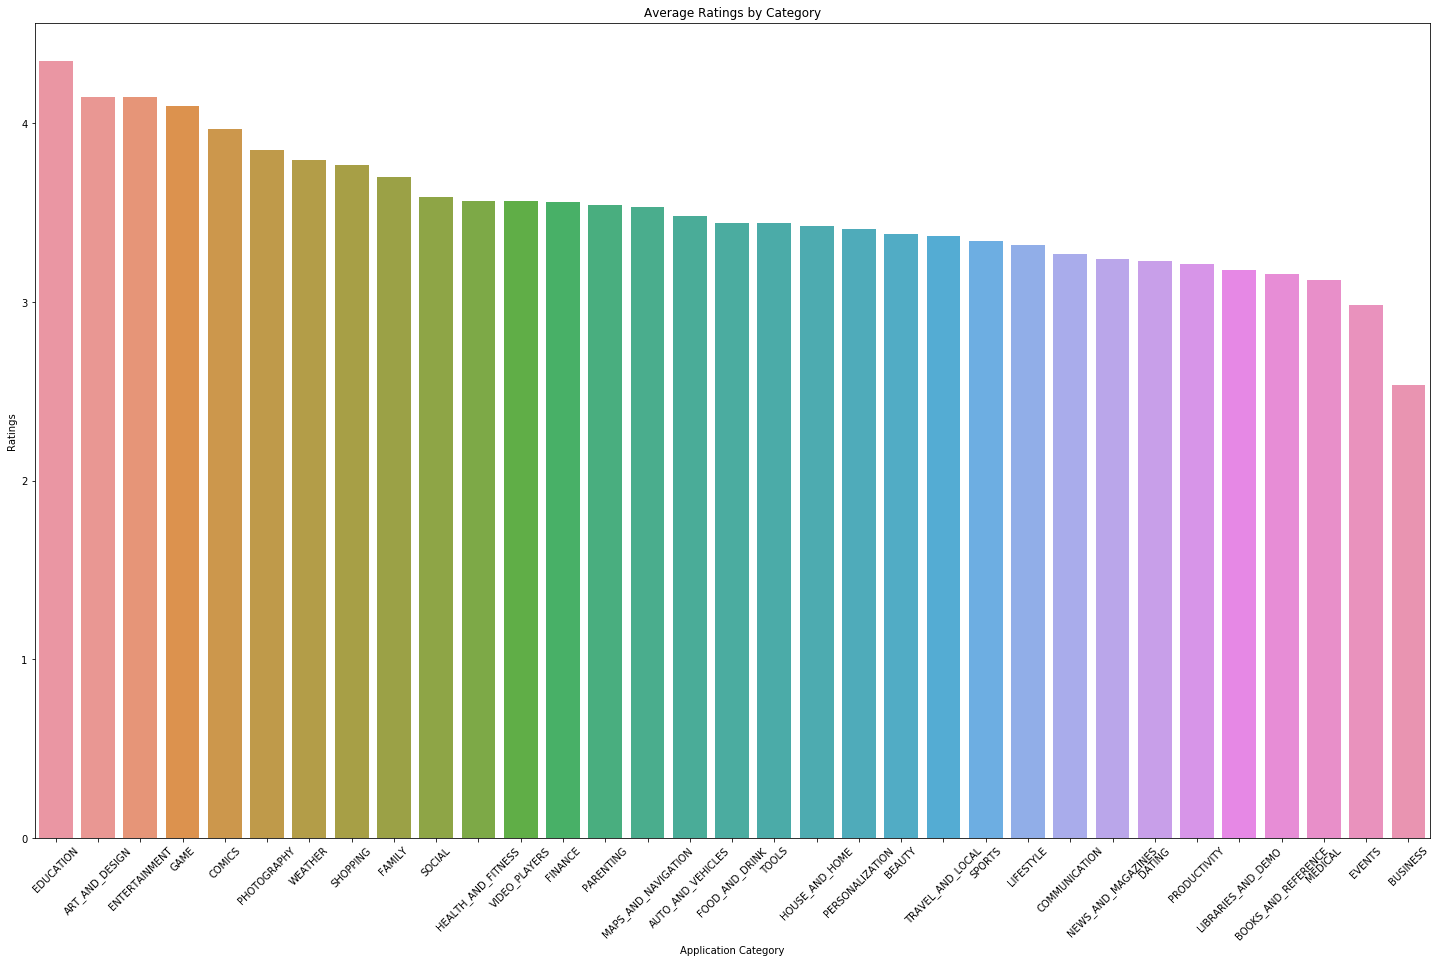

In [23]:

plt.figure(figsize=(25,15))
sns.barplot(x=cate_rate.Category, y=cate_rate['Average Rating'])

plt.xticks(rotation = 45)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category')
plt.show()